In [1]:
import json
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key_NBA

In [2]:
teamlist_id = [1,2,4,5,6,7,8,9,10,11,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,38,40,41]
teamlist_names = ["Atlanta Hawks","Boston Celtics","Brooklyn Nets","Charlotte Hornets","Chicago Bulls","Cleveland Cavaliers","Dallas Mavericks","Denver Nuggets","Detroit Pistons","Golden State Warriors","Houston Rockets","Indiana Pacers","LA Clippers","Los Angeles Lakers","Memphis Grizzlies","Miami Heat","Milwaukee Bucks","Minnesota Timberwolves","New Orleans Pelicans","New York Knicks","Oklahoma City Thunder","Orlando Magic","Philadelphia 76ers","Phoenix Suns","Portland Trail Blazers","Sacramento Kings","San Antonio Spurs","Toronto Raptors","Utah Jazz","Washington Wizards"]

In [3]:
teams_df = pd.DataFrame({
"Team Id": teamlist_id,
"Team Name": teamlist_names
})
teams_df.head()

,Team Id,Team Name
0,1,Atlanta Hawks
1,2,Boston Celtics
2,4,Brooklyn Nets
3,5,Charlotte Hornets
4,6,Chicago Bulls


In [4]:
teamID = input("Choose a team from above ")
team_url = "https://api-nba-v1.p.rapidapi.com/players/teamId"
query_url = f"{team_url}/{teamID}"

Choose a team from above 6


In [5]:
team_response = requests.get(query_url,
  headers={
    "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
    "X-RapidAPI-Key": api_key_NBA
  }
)

In [6]:
team_details = team_response.json()
players = team_details["api"]["players"]

In [7]:
player_list_id = []
player_list_first_name = []
player_list_last_name = []

for player in players:
    player_list_id.append(player["playerId"])
    player_list_first_name.append(player["firstName"])
    player_list_last_name.append(player["lastName"])

In [8]:
df = pd.DataFrame({
"Player Id": player_list_id,
"Name": player_list_first_name,
"Last Name": player_list_last_name
})
df

,Player Id,Name,Last Name
0,152,Kris,Dunn
1,155,Jarell,Eddie
2,171,Cristiano,Felicio
3,296,Sean,Kilpatrick
4,308,Zach,LaVine
5,329,Timothe,Luwawu-Cabarrot
6,430,Otto,Porter Jr.
7,470,Tomas,Satoransky
8,526,Denzel,Valentine
9,570,Thaddeus,Young


In [10]:
player_data = []
for player in player_list_id:
    player_response = requests.get(f"https://api-nba-v1.p.rapidapi.com/statistics/players/playerId/{player}", headers={"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com","X-RapidAPI-Key": api_key_NBA})
    print(f"Processing {player} {player_response}")
    player_json = player_response.json()
    player_data.append(player_json)

Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 2 <Response [200]>
Processing 3 <Response [200]>
Processing 3 <Response [200]>
Processing 4 <Response [200]>
Processing 4 <Response [200]>
Processing 5 <Response [200]>
Processing 5 <Response [200]>
Processing 5 <Response [200]>
Processing 5 <Response [200]>
Processing 6 <Response [200]>
Processing 6 <Response [200]>
Processing 7 <Response [200]>
Processing 7 <Response [200]>
Processing 8 <Response [200]>
Processing 8 <Response [200]>
Processing 9 <Response [200]>
Processing 9 <Response [200]>
Processing 9 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing 1 <Response [200]>
Processing

In [11]:
season_response = requests.get("https://api-nba-v1.p.rapidapi.com/games/seasonYear/2018",
  headers={
    "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
    "X-RapidAPI-Key": api_key_NBA
  }
)

In [12]:
season_details = season_response.json()
season_details["api"]["results"]

1868

In [13]:
games = []
leagues = []
for g in season_details["api"]["games"]:
    games.append(g["gameId"])
    leagues.append(g["league"])

In [14]:
games = pd.to_numeric(games)

In [15]:
games_df = pd.DataFrame({
"Game": games,
"League": leagues
})
games_df.head()
#aquí se filtrarian las ligas necesarias, por ahora se están considerando todas las ligas

,Game,League
0,5706,utah
1,5707,utah
2,5618,sacramento
3,5619,sacramento
4,5708,utah


In [16]:
player_data[0]["api"]["statistics"][0]

{'gameId': '1460',
 'teamId': '22',
 'points': '6',
 'pos': '',
 'min': '24:13',
 'fgm': '2',
 'fga': '8',
 'fgp': '25.0',
 'ftm': '1',
 'fta': '2',
 'ftp': '50.0',
 'tpm': '1',
 'tpa': '2',
 'tpp': '50.0',
 'offReb': '1',
 'defReb': '3',
 'totReb': '4',
 'assists': '7',
 'pFouls': '4',
 'steals': '2',
 'turnovers': '4',
 'blocks': '0',
 'plusMinus': '6',
 'playerId': '152'}

In [31]:
game_ids = []
player_ids = []
plusminus = []
minutes = []

for o in player_data:
    for f in o["api"]["statistics"]:
        f["gameId"] = pd.to_numeric(f["gameId"])
        if f["gameId"] in games:
            game_ids.append(f["gameId"])
            player_ids.append(f["playerId"])
            plusminus.append(f["plusMinus"])
            minutes.append(f["min"])

In [32]:
df3 = pd.DataFrame({
"Game": game_ids,
"Player Id": player_ids,
"+/-": plusminus,
"Min": minutes
})
df3.head()
#ya que tomamos una muestra de jugadores, estos no participan en todos los juegos, es correcto que reduzcan los datos

,Game,Player Id,+/-,Min
0,4316,152,8,22:34
1,4329,152,-30,20:04
2,4355,152,-15,24:33
3,4370,152,18,22:40
4,4382,152,-13,22:05


In [33]:
df3[["Min", "Seg"]] = df3["Min"].str.split(":", expand = True)

In [34]:
df3.head()

,Game,Player Id,+/-,Min,Seg
0,4316,152,8,22,34
1,4329,152,-30,20,04
2,4355,152,-15,24,33
3,4370,152,18,22,40
4,4382,152,-13,22,05


In [35]:
df3["+/-"] = pd.to_numeric(df3["+/-"])
df3["Min"] = pd.to_numeric(df3["Min"])
df3["Seg"] = pd.to_numeric(df3["Seg"])
total_minutes = df3["Min"] + df3["Seg"]/60
df3["Minutes"] = total_minutes
weighed_plusminus = df3["+/-"]*df3["Minutes"]

In [36]:
df3["Minutes"] = total_minutes
df3["Weighed +/-"] = weighed_plusminus
df3.head()

,Game,Player Id,+/-,Min,Seg,Minutes,Weighed +/-
0,4316,152,8.0,22.0,34.0,22.566667,180.533333
1,4329,152,-30.0,20.0,4.0,20.066667,-602.000000
2,4355,152,-15.0,24.0,33.0,24.550000,-368.250000
3,4370,152,18.0,22.0,40.0,22.666667,408.000000
4,4382,152,-13.0,22.0,5.0,22.083333,-287.083333


In [37]:
grouped_df3 = df3.groupby(["Player Id"])
grouped_players = grouped_df3["Game"].count()
grouped_plusminus = grouped_df3["+/-"].mean()
grouped_minutes = grouped_df3["Minutes"].sum()
grouped_weighed = grouped_df3["Weighed +/-"].sum()

In [38]:
df5 = pd.DataFrame({
"Games Played": grouped_players,
"Average +/-": grouped_plusminus,
"Minutes Played": grouped_minutes,
"Total Weighed +/-": grouped_weighed
})
df5.head()

,Games Played,Average +/-,Minutes Played,Total Weighed +/-
Player Id,,,,
1051,16,0.0,347.516667,94.500000
1374,6,-0.5,65.016667,-56.300000
1389,5,0.4,41.833333,38.616667
1442,5,-4.8,134.016667,-641.550000
1478,5,0.0,2.216667,1.366667


In [39]:
df6 = pd.merge(df, df5, on = "Player Id")
df6.head()
#la disminución en el número de jugadores se debe a que se seleccionarion juegos de la temporada 2018 únicamente

,Player Id,Name,Last Name,Games Played,Average +/-,Minutes Played,Total Weighed +/-
0,152,Kris,Dunn,53,-5.000000,1501.366667,-6469.250000
1,155,Jarell,Eddie,6,-2.833333,96.283333,-314.916667
2,171,Cristiano,Felicio,85,-1.458824,770.666667,-1848.300000
3,308,Zach,LaVine,72,-4.686567,2244.800000,-9008.450000
4,329,Timothe,Luwawu-Cabarrot,78,-2.897436,726.433333,-3868.300000


In [40]:
df6["Factor"] = df6["Total Weighed +/-"]/df6["Games Played"]
df6.sort_values(by = "Factor", ascending = False)
#sería recomendable discriminar a jugadores que tengan muy pocos games played, para poder comparar en condiciones similares

,Player Id,Name,Last Name,Games Played,Average +/-,Minutes Played,Total Weighed +/-,Factor
15,894,Derrick,Walton Jr.,12,3.416667,204.300000,869.583333,72.465278
25,1653,Melo,Trimble,5,4.800000,46.433333,325.250000,65.050000
8,570,Thaddeus,Young,89,1.250000,2648.666667,4107.666667,46.153558
5,430,Otto,Porter Jr.,62,0.048387,1780.850000,1433.416667,23.119624
21,1389,Kaiser,Gates,5,0.400000,41.833333,38.616667,7.723333
16,925,Rawle,Alkins,30,0.500000,251.600000,226.400000,7.546667
19,1051,Walter,Lemon Jr.,16,0.000000,347.516667,94.500000,5.906250
26,1675,Sekou,Wiggs,5,0.000000,2.216667,1.366667,0.273333
23,1478,Oleksandr,Kobets,5,0.000000,2.216667,1.366667,0.273333
7,526,Denzel,Valentine,3,0.000000,0.000000,0.000000,0.000000


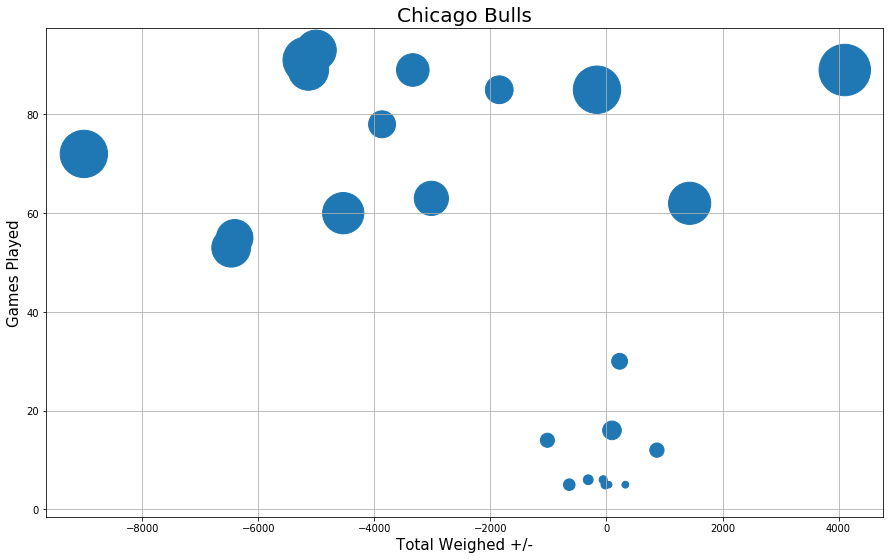

In [73]:
teams_df["Team Id"] = pd.to_numeric(teams_df["Team Id"])
teamID = pd.to_numeric(teamID)
team_name = teams_df.loc[teams_df["Team Id"] == teamID, "Team Name"]
gamesvstotalweighed = plt.scatter(df6["Total Weighed +/-"], df6["Games Played"], s = df6["Minutes Played"])
fig = plt.gcf()
fig.set_size_inches(15, 9)
plt.xlabel("Total Weighed +/-", fontsize = 15)
plt.ylabel("Games Played", fontsize = 15)
plt.title(f"{team_name.item()}", fontsize = 20)
plt.grid()
plt.show()

In [ ]:
#ahora busca la manera de agregar más de un equipo al plot, ajustando todo el código